In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
import numpy as np

In [94]:
data_file = '../data/fish.csv'

In [140]:
DF = pd.read_csv(data_file) # 원하는 헤더  usecols=[0,1,2]
newDF = DF[DF['Species']=='Perch']
newDF = newDF.reset_index(drop=True)
newDF.describe()

,Weight,Length,Diagonal,Height,Width
count,56.000000,56.000000,56.000000,56.000000,56.000000
mean,382.239286,27.892857,29.571429,7.861870,4.745723
std,347.617717,9.021668,9.529509,2.878177,1.774626
min,5.900000,8.400000,8.800000,2.112000,1.408000
25%,120.000000,21.825000,23.325000,5.692500,3.525000
50%,207.500000,25.300000,26.750000,6.921800,4.154900
75%,692.500000,36.625000,39.075000,10.846500,6.448125
max,1100.000000,44.000000,46.600000,12.800200,8.142000


In [141]:
newDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   56 non-null     object 
 1   Weight    56 non-null     float64
 2   Length    56 non-null     float64
 3   Diagonal  56 non-null     float64
 4   Height    56 non-null     float64
 5   Width     56 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.8+ KB


In [142]:
newDF.head(5)

,Species,Weight,Length,Diagonal,Height,Width
0,Perch,5.9,8.4,8.8,2.1120,1.4080
1,Perch,32.0,13.7,14.7,3.5280,1.9992
2,Perch,40.0,15.0,16.0,3.8240,2.4320
3,Perch,51.5,16.2,17.2,4.5924,2.6316
4,Perch,70.0,17.4,18.5,4.5880,2.9415


In [143]:
newDF.describe()

,Weight,Length,Diagonal,Height,Width
count,56.000000,56.000000,56.000000,56.000000,56.000000
mean,382.239286,27.892857,29.571429,7.861870,4.745723
std,347.617717,9.021668,9.529509,2.878177,1.774626
min,5.900000,8.400000,8.800000,2.112000,1.408000
25%,120.000000,21.825000,23.325000,5.692500,3.525000
50%,207.500000,25.300000,26.750000,6.921800,4.154900
75%,692.500000,36.625000,39.075000,10.846500,6.448125
max,1100.000000,44.000000,46.600000,12.800200,8.142000


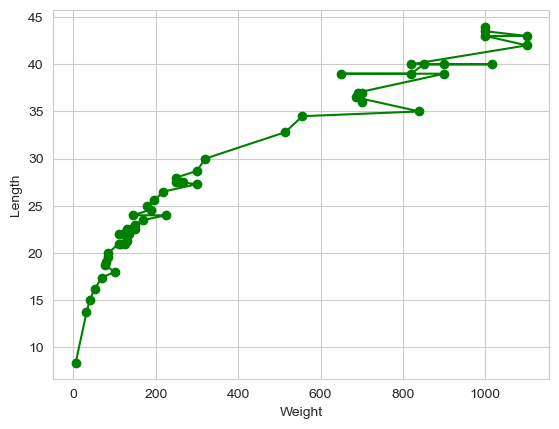

In [144]:
# 무게와 길이에 대한 시각화

plt.plot(newDF[newDF.columns[1]], newDF[newDF.columns[2]], 'go-')
plt.xlabel(newDF.columns[1])
plt.ylabel(newDF.columns[2])
plt.show()

In [145]:
newDF.corr(numeric_only=True)

,Weight,Length,Diagonal,Height,Width
Weight,1.000000,0.958656,0.959506,0.968441,0.963943
Length,0.958656,1.000000,0.999779,0.985584,0.974617
Diagonal,0.959506,0.999779,1.000000,0.985909,0.975131
Height,0.968441,0.985584,0.985909,1.000000,0.982943
Width,0.963943,0.974617,0.975131,0.982943,1.000000


In [146]:
newDF.iloc[:3]


,Species,Weight,Length,Diagonal,Height,Width
0,Perch,5.9,8.4,8.8,2.112,1.4080
1,Perch,32.0,13.7,14.7,3.528,1.9992
2,Perch,40.0,15.0,16.0,3.824,2.4320


In [147]:
model = LinearRegression()

In [148]:
model.fit(newDF[[newDF.columns[1]]], newDF[newDF.columns[2]])


LinearRegression()

# KNN

In [149]:
# 피쳐/특성/속성 데이터 추출
featureDF = newDF[newDF.columns[1:]]
targetDF = newDF[newDF.columns[0]]
targetDF = targetDF.replace({newDF.columns[0]:0, newDF.columns[1]:1})


featureDF.head(2)

,Weight,Length,Diagonal,Height,Width
0,5.9,8.4,8.8,2.112,1.4080
1,32.0,13.7,14.7,3.528,1.9992


In [150]:
# 모듈 로딩
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(featureDF,
                                                    targetDF,
                                                    test_size=0.2,
                                                    stratify=targetDF)
print(y_train)

16    Perch
29    Perch
32    Perch
13    Perch
22    Perch
7     Perch
31    Perch
12    Perch
8     Perch
1     Perch
4     Perch
19    Perch
42    Perch
37    Perch
33    Perch
54    Perch
24    Perch
2     Perch
35    Perch
45    Perch
34    Perch
5     Perch
52    Perch
44    Perch
47    Perch
40    Perch
3     Perch
49    Perch
46    Perch
25    Perch
18    Perch
20    Perch
23    Perch
11    Perch
28    Perch
21    Perch
0     Perch
55    Perch
50    Perch
26    Perch
38    Perch
39    Perch
27    Perch
51    Perch
Name: Species, dtype: object


In [151]:
# 모듈로딩
from sklearn.preprocessing import StandardScaler

In [152]:
scaler = StandardScaler()

In [153]:
scaler.fit(X_train)

StandardScaler()

In [154]:
scaler.mean_

array([380.62272727,  27.79545455,  29.47045455,   7.84782045,
         4.7317    ])

In [155]:
scaled_X_train=scaler.transform(X_train) # 검증이나 데이터에 사용할 때 새 변수명 부여해서 반복 사용
scaled_X_train

array([[-0.72884005, -0.63636914, -0.62153533, -0.59736719, -0.67541829],
       [-0.47292581, -0.14224722, -0.15307703, -0.23368492, -0.32894947],
       [-0.33624434, -0.03244235, -0.05938537, -0.27369684, -0.22204229],
       [-0.72884005, -0.71323255, -0.69440662, -0.50318104, -0.67038078],
       [-0.67067773, -0.52656427, -0.51743348, -0.9038159 , -0.61888622],
       [-0.87424587, -0.96578376, -0.96507141, -0.76037109, -0.94117499],
       [-0.35078493, -0.03244235, -0.05938537, -0.23395992, -0.22204229],
       [-0.74338063, -0.74617401, -0.72563717, -0.74088075, -0.5956577 ],
       [-0.85970529, -0.89990083, -0.90261031, -0.93162488, -0.94867528],
       [-1.01383546, -1.54774958, -1.53763156, -1.48491692, -1.52944434],
       [-0.90332703, -1.14147155, -1.14204455, -1.12054716, -1.00201693],
       [-0.72884005, -0.58146671, -0.56948441, -0.68467843, -0.62000567],
       [ 0.92878627,  1.01070393,  1.03368399,  1.0268282 ,  0.85800008],
       [ 0.38787663,  0.54952347,  0.4

In [156]:
scaler.fit_transform(X_train) # fit_transform : 검증이나 데이터에 사용하지 않을 때 사용

array([[-0.72884005, -0.63636914, -0.62153533, -0.59736719, -0.67541829],
       [-0.47292581, -0.14224722, -0.15307703, -0.23368492, -0.32894947],
       [-0.33624434, -0.03244235, -0.05938537, -0.27369684, -0.22204229],
       [-0.72884005, -0.71323255, -0.69440662, -0.50318104, -0.67038078],
       [-0.67067773, -0.52656427, -0.51743348, -0.9038159 , -0.61888622],
       [-0.87424587, -0.96578376, -0.96507141, -0.76037109, -0.94117499],
       [-0.35078493, -0.03244235, -0.05938537, -0.23395992, -0.22204229],
       [-0.74338063, -0.74617401, -0.72563717, -0.74088075, -0.5956577 ],
       [-0.85970529, -0.89990083, -0.90261031, -0.93162488, -0.94867528],
       [-1.01383546, -1.54774958, -1.53763156, -1.48491692, -1.52944434],
       [-0.90332703, -1.14147155, -1.14204455, -1.12054716, -1.00201693],
       [-0.72884005, -0.58146671, -0.56948441, -0.68467843, -0.62000567],
       [ 0.92878627,  1.01070393,  1.03368399,  1.0268282 ,  0.85800008],
       [ 0.38787663,  0.54952347,  0.4

In [157]:
# 테스트용 데이터 피쳐 스케일링
scaled_X_test = scaler.transform(X_test)
scaled_X_test

array([[ 1.51040954,  1.34011855,  1.35639971,  1.33448002,  1.39555849],
       [-0.75792122, -0.63636914, -0.62153533, -0.59736719, -0.7411858 ],
       [ 0.92878627,  0.90089906,  0.91917196,  0.94917619,  1.12454039],
       [-0.85970529, -0.85597889, -0.88178994, -0.9507371 , -1.09689006],
       [-0.17629794,  0.24206983,  0.22168961, -0.07982463,  0.02233297],
       [-0.78700238, -0.74617401, -0.72563717, -0.74088075, -0.65862659],
       [ 2.09203281,  1.66953316,  1.66870524,  1.60346052,  1.50274553],
       [ 0.89970511,  1.01070393,  1.02327381,  0.93632012,  0.91509188],
       [-0.8800621 , -0.99872522, -1.04835289, -0.91045018, -0.90020323],
       [-0.75792122, -0.63636914, -0.62153533, -0.75892736, -0.67541829],
       [-0.71429947, -0.63636914, -0.62153533, -0.67814727, -0.67541829],
       [-0.23446027, -0.05440332, -0.08020574,  0.16334062,  0.22702383]])

In [158]:

X_train

,Weight,Length,Diagonal,Height,Width
16,130.0,22.0,23.5,6.1100,3.5250
29,218.0,26.5,28.0,7.1680,4.1440
32,265.0,27.5,28.9,7.0516,4.3350
13,130.0,21.3,22.8,6.3840,3.5340
22,150.0,23.0,24.5,5.2185,3.6260
7,80.0,19.0,20.2,5.6358,3.0502
31,260.0,27.5,28.9,7.1672,4.3350
12,125.0,21.0,22.5,5.6925,3.6675
8,85.0,19.6,20.8,5.1376,3.0368
1,32.0,13.7,14.7,3.5280,1.9992


Text(0, 0.5, 'Length')

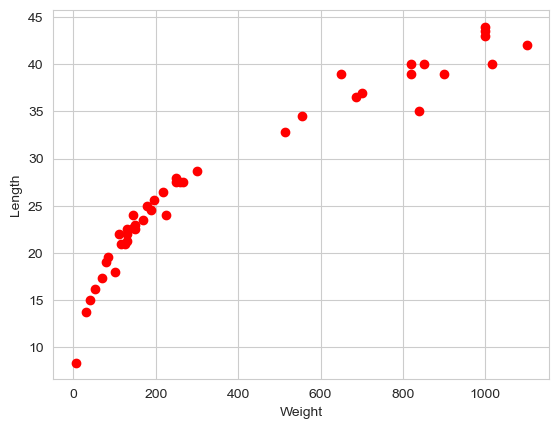

In [159]:
## 원본 데이터 시각화
import matplotlib.pyplot as plt

plt.plot(X_train[X_train.columns[0]], X_train[X_train.columns[1]], 'ro')

# 학습 데이터 시각화
# plt.scatter(twoFishDF.Weight, twoFishDF.Length, c=twoFishDF.Species)
plt.xlabel(X_train.columns[0])
plt.ylabel(X_train.columns[1])

(-2.0, 2.0)

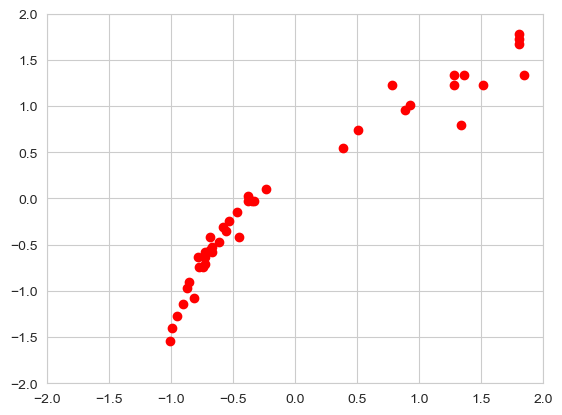

In [160]:
## => 스케일됨 데이터 시각화 ==> scaled_X_train
scaled_X_train.shape, scaled_X_train.ndim

plt.plot(scaled_X_train[:,0], scaled_X_train[:,1], 'ro')
plt.xlim(-2,2)
plt.ylim(-2,2)


In [161]:
from sklearn.neighbors import KNeighborsClassifier      # 기계학습 관련 모듈

max_k = scaled_X_train.shape[0]
max_k

test_scoreList = []
train_scoreList = []
for k in range(1,max_k+1):
    fishModel = KNeighborsClassifier(n_neighbors=k)
    fishModel.fit(scaled_X_train, y_train)
    train_scoreList.append(fishModel.score(scaled_X_train,y_train))
    test_scoreList.append(fishModel.score(scaled_X_test,y_test))

Text(0, 0.5, 'Score')

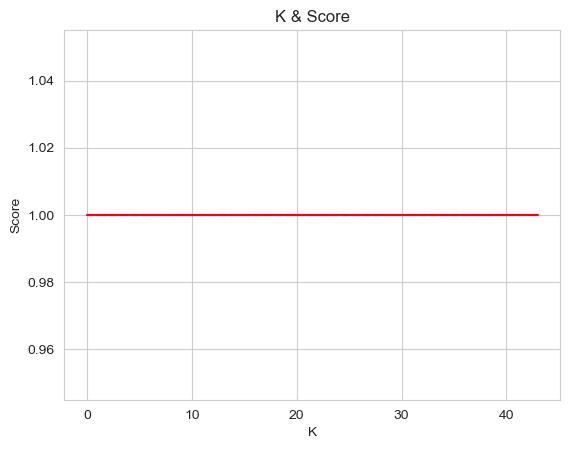

In [162]:
# k 갯수에 따른 학습용/테스트용 점수 시각화
plt.plot(train_scoreList, 'b--', label='Train Score')
plt.plot(test_scoreList, 'r-', label='Test Score')
plt.title("K & Score")
plt.xlabel('K')
plt.ylabel('Score')

In [163]:
scaled_X_train=scaler.transform(X_train) # 검증이나 데이터에 사용할 때 새 변수명 부여해서 반복 사용

In [164]:
scaled_X_train

array([[-0.72884005, -0.63636914, -0.62153533, -0.59736719, -0.67541829],
       [-0.47292581, -0.14224722, -0.15307703, -0.23368492, -0.32894947],
       [-0.33624434, -0.03244235, -0.05938537, -0.27369684, -0.22204229],
       [-0.72884005, -0.71323255, -0.69440662, -0.50318104, -0.67038078],
       [-0.67067773, -0.52656427, -0.51743348, -0.9038159 , -0.61888622],
       [-0.87424587, -0.96578376, -0.96507141, -0.76037109, -0.94117499],
       [-0.35078493, -0.03244235, -0.05938537, -0.23395992, -0.22204229],
       [-0.74338063, -0.74617401, -0.72563717, -0.74088075, -0.5956577 ],
       [-0.85970529, -0.89990083, -0.90261031, -0.93162488, -0.94867528],
       [-1.01383546, -1.54774958, -1.53763156, -1.48491692, -1.52944434],
       [-0.90332703, -1.14147155, -1.14204455, -1.12054716, -1.00201693],
       [-0.72884005, -0.58146671, -0.56948441, -0.68467843, -0.62000567],
       [ 0.92878627,  1.01070393,  1.03368399,  1.0268282 ,  0.85800008],
       [ 0.38787663,  0.54952347,  0.4

In [165]:
from sklearn.svm import SVC

fishmodel2=SVC()
fishmodel2.fit(scaled_X_train,y_train)

ValueError: The number of classes has to be greater than one; got 1 class

In [166]:
## 방법 (3) : logistic regression
from sklearn.linear_model import LogisticRegression

fishmodel3 = LogisticRegression()
fishmodel3.fit(scaled_X_train,y_train)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 'Perch'

In [167]:
print('KNN', fishModel.score(scaled_X_test, y_test))
print('SVC', fishmodel2.score(scaled_X_test, y_test))
print('LogisticRegression', fishmodel3.score(scaled_X_test, y_test))

KNN 1.0


AttributeError: 'SVC' object has no attribute 'support_vectors_'

# KNNRegression

In [168]:
# 학습 후 속성 확인
print(f'피쳐에 할당되는 가중치 (x항)계수 : {model.coef_}')
print(f'수식에 사용되는 절편          : {model.intercept_}')

피쳐에 할당되는 가중치 (x항)계수 : [0.02487985]
수식에 사용되는 절편          : 18.382802913636723


In [169]:
(newDF[newDF.columns[1]]*model.coef_) + model.intercept_

0     18.529594
1     19.178958
2     19.377997
3     19.664115
4     20.124392
5     20.870787
6     20.323431
7     20.373191
8     20.497590
9     20.497590
10    21.119586
11    21.243985
12    21.492784
13    21.617183
14    21.368384
15    21.368384
16    21.617183
17    21.741582
18    21.119586
19    21.617183
20    22.114780
21    21.990380
22    22.114780
23    22.612377
24    23.980768
25    21.990380
26    23.060214
27    22.861175
28    23.284132
29    23.806609
30    25.846756
31    24.851563
32    24.975962
33    24.602764
34    24.602764
35    25.846756
36    26.344353
37    31.171043
38    32.215997
39    39.281873
40    35.425497
41    35.798695
42    35.798695
43    35.549896
44    40.774664
45    34.554702
46    38.784276
47    39.530671
48    40.774664
49    43.635846
50    38.784276
51    45.750633
52    43.262648
53    45.750633
54    43.262648
55    43.262648
Name: Weight, dtype: float64

In [170]:
# 결정계수 : 1.0에 가까울수록 잘 만들어진 모델
model.score(newDF[[newDF.columns[1]]], newDF[newDF.columns[2]])


0.9190210732447819

In [171]:
y_pre = model.predict(newDF[[newDF.columns[1]]])
y_pre = np.round(y_pre,1)
y_pre

array([18.5, 19.2, 19.4, 19.7, 20.1, 20.9, 20.3, 20.4, 20.5, 20.5, 21.1,
       21.2, 21.5, 21.6, 21.4, 21.4, 21.6, 21.7, 21.1, 21.6, 22.1, 22. ,
       22.1, 22.6, 24. , 22. , 23.1, 22.9, 23.3, 23.8, 25.8, 24.9, 25. ,
       24.6, 24.6, 25.8, 26.3, 31.2, 32.2, 39.3, 35.4, 35.8, 35.8, 35.5,
       40.8, 34.6, 38.8, 39.5, 40.8, 43.6, 38.8, 45.8, 43.3, 45.8, 43.3,
       43.3])

In [172]:
# 오차 계산 => 예측값 - 정답
errorSR = y_pre - newDF[newDF.columns[2]]
errorSR

0     10.1
1      5.5
2      4.4
3      3.5
4      2.7
5      2.9
6      1.6
7      1.4
8      0.9
9      0.5
10     0.1
11     0.2
12     0.5
13     0.3
14    -0.6
15    -0.6
16    -0.4
17    -0.3
18    -0.9
19    -0.9
20    -0.4
21    -0.7
22    -0.9
23    -0.9
24     0.0
25    -2.0
26    -1.5
27    -2.1
28    -2.3
29    -2.7
30    -1.5
31    -2.6
32    -2.5
33    -2.9
34    -3.4
35    -2.9
36    -3.7
37    -1.6
38    -2.3
39     4.3
40    -1.1
41    -0.2
42    -1.2
43    -1.5
44     1.8
45    -4.4
46    -0.2
47    -0.5
48     0.8
49     3.6
50    -1.2
51     3.8
52     0.3
53     2.8
54    -0.2
55    -0.7
Name: Length, dtype: float64

In [173]:
np.round(y_pre,1), newDF[newDF.columns[2]]

(array([18.5, 19.2, 19.4, 19.7, 20.1, 20.9, 20.3, 20.4, 20.5, 20.5, 21.1,
        21.2, 21.5, 21.6, 21.4, 21.4, 21.6, 21.7, 21.1, 21.6, 22.1, 22. ,
        22.1, 22.6, 24. , 22. , 23.1, 22.9, 23.3, 23.8, 25.8, 24.9, 25. ,
        24.6, 24.6, 25.8, 26.3, 31.2, 32.2, 39.3, 35.4, 35.8, 35.8, 35.5,
        40.8, 34.6, 38.8, 39.5, 40.8, 43.6, 38.8, 45.8, 43.3, 45.8, 43.3,
        43.3]),
 0      8.4
 1     13.7
 2     15.0
 3     16.2
 4     17.4
 5     18.0
 6     18.7
 7     19.0
 8     19.6
 9     20.0
 10    21.0
 11    21.0
 12    21.0
 13    21.3
 14    22.0
 15    22.0
 16    22.0
 17    22.0
 18    22.0
 19    22.5
 20    22.5
 21    22.7
 22    23.0
 23    23.5
 24    24.0
 25    24.0
 26    24.6
 27    25.0
 28    25.6
 29    26.5
 30    27.3
 31    27.5
 32    27.5
 33    27.5
 34    28.0
 35    28.7
 36    30.0
 37    32.8
 38    34.5
 39    35.0
 40    36.5
 41    36.0
 42    37.0
 43    37.0
 44    39.0
 45    39.0
 46    39.0
 47    40.0
 48    40.0
 49    40.0
 50    40.0
 5

In [174]:
(errorSR**2).sum() / errorSR.shape[0] # 분산


6.483571428571426

In [175]:
# 정답과 완벽히 똑같은 갯수 찾기
errorSR[(y_pre-newDF[newDF.columns[2]]) == 0.0]

24    0.0
Name: Length, dtype: float64

In [176]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 결정 계수 값
r2_score(newDF[newDF.columns[2]], y_pre)

0.918891577369194

In [177]:
# 평균제곱오차 : MSE
mean_squared_error(newDF[newDF.columns[2]], y_pre)

6.483571428571426

In [178]:
# 루트평균제곱오차 : RMSE - 1.4 버전에 추가
# root_mean_squared_eroor(perchDF.Length, y_pre) 아래 식으로도 가능
mean_squared_error(newDF[newDF.columns[2]], y_pre, squared=False)

2.5462858104642194

In [179]:
# 평균절대값오차
mean_absolute_error(newDF[newDF.columns[2]], y_pre)

1.8535714285714282